## Predicting Car Prices

This project will use an automobile data set in order to practice the k-nearest neighbors algorithm. <br>
In this model we will see how different parameters can be used to predict the price of a car.

Link for the documentation : 
[Documentation](https://archive.ics.uci.edu/ml/datasets/automobile) <br>


In [22]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import itertools ; import matplotlib.pyplot as plt

### 1. Import Dataset

In [23]:
#From the documentation we get the names of the columns  
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In order to run the analysis, we need to keep the continous numerical columns. From the documentation wa can see that these are:
- Normalized losses 
- Wheel-base
- length
- width
- height
- curb-weight
- engine-size
- bore
- stroke
- compression-ratio
- horsepower
- peak-rpm
- city-mpg
- highway-mpg
- price



In [24]:
# List of columns with continuous numerical values
cncols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 
'price']
# Select only this list from the dataset
dfn = cars[cncols]
dfn.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Data Cleaning

From the dataset above it can observed that some values are marked with a "?" sign, we need to clean these values.

In [25]:
#First step we are going to replace the "?" by NaN values
dfn = dfn.replace("?", np.nan)
dfn.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
# Now we are going to determine the types of the data in the columns.
dfn.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

We see that some columns have the object type instead of float or integer, the object type will cause issues later when we try to predict a model. We therefore need to change the types of those columns.

In [27]:
dfn[dfn.select_dtypes(include = object).columns] = dfn.select_dtypes(include = object).apply(lambda x: x.astype(np.float))
#dfn.dtypes

We are now going to take care of the NaN values, first we'll see how many NaN values we have by columns.

In [28]:
dfn.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We see that there are 4 NaN values in the price column, it means that we won't be able to use these rows for prediction. We are therefore going to remove them. <br>
Then we see that we have other values, to take care of them we will replace them by the mean of the column.

In [29]:
dfn.dropna(axis = 0, subset=['price'], inplace = True)
dfn.fillna(dfn.mean(), inplace = True)
dfn.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

For the regression we need to normalize all the predictors columns.

In [30]:
dfn[dfn.columns.difference(['price'])] = dfn[dfn.columns.difference(['price'])].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dfn

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


### 3. Univariate Model

In [31]:
def knn_train_test_uni(train_col, target_col, df, *argv):
    ''' Parameters : train_col = list of column names, target_col = name target column, df = dataframe of 
    the columns 
    Returns : The square root of the errors'''
    x = df[[train_col]] ; y = df[[target_col]]
    # Split into train and test   
    x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.3, shuffle=True, random_state=1)
    
    # Knn . fit train x and train y 
    knn = KNeighborsRegressor(*argv)
    knn.fit(x_train, y_train)

    # Make prediction 
    predictions = knn.predict(x_test)
    
    # Calculate RMSE 
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    return rmse


In [32]:
trc = dfn.columns.difference(['price']).values.tolist()
tgt = 'price'

lst_rmse = []
for col in trc:
    lst_rmse.append(knn_train_test_uni(col,tgt,dfn))

rmse_uni = pd.DataFrame(list(zip(trc, lst_rmse)),
              columns=['Predictor','RMSE'])
rmse_uni.sort_values(by=['RMSE'])

,Predictor,RMSE
4,engine-size,3301.466897
7,horsepower,3316.586002
3,curb-weight,3622.017715
13,width,3752.382074
1,city-mpg,3856.939738
8,length,3946.452233
6,highway-mpg,4080.557636
12,wheel-base,4793.390985
0,bore,5455.307928
11,stroke,6260.138202


In [33]:
trc = dfn.columns.difference(['price']).values.tolist()
tgt = 'price'
K = [1,3,5,7,9]
lst_rmse = []
for col, k in itertools.product(trc,K):
        lst_rmse.append(knn_train_test_uni(col,tgt,dfn,k))

indexes = pd.MultiIndex.from_product([trc, K],
                           names=['Predictor', 'K'])
df = pd.DataFrame(lst_rmse, index = indexes, columns = ['RMSE'])
df


RMSE
Predictor K              
bore      1  12441.409442
          3   5790.222384
          5   5455.307928
          7   5600.108346
          9   5816.123928
...                   ...
width     1   3832.113824
          3   3737.822094
          5   3752.382074
          7   3777.504768
          9   3635.978073

[70 rows x 1 columns]

Now the dataframe is quite long, therefore to be able to easily see which K provides the lowest RMSE score I decided to compute the mean.

In [34]:
x = df.groupby(["K"], as_index = True ).mean()
x

,RMSE
K,
1,5960.745734
3,4924.694861
5,4988.530114
7,5077.491949
9,5028.791957


We can then see that on average, K = 3 provide the lowest errors. 

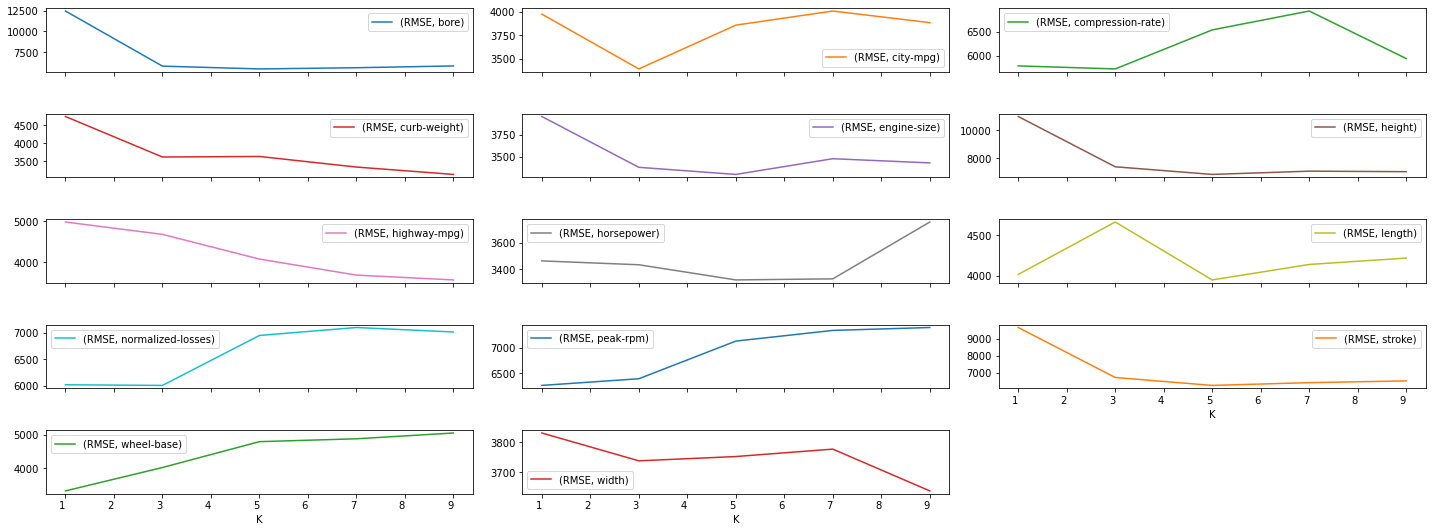

In [35]:
ax = df.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(20, 10), layout=(7, 3))
plt.tight_layout()

### 4. Multivariate Model

We will now have to run all the KNeighborsRegressor for all predictors. 

In [36]:
sort_pred = df.groupby(["Predictor"], as_index = True ).mean().sort_values(by = 'RMSE')
sort_pred

,RMSE
Predictor,
horsepower,3458.652981
engine-size,3509.020546
curb-weight,3682.584638
width,3747.160167
city-mpg,3822.553383
length,4194.916386
highway-mpg,4200.847553
wheel-base,4414.932258
compression-rate,6183.657181


From the table above we are now going to apply the knn_train_test function on the best 2,3,4 and 5 parameters with the default parameter k. 

In [37]:
def knn_train_test_multi(train_col, target_col, df, *argv):
    ''' Parameters : train_col = list of column names, target_col = name target column, df = dataframe of 
    the columns 
    Returns : The square root of the errors'''
    x = df[train_col] ; y = df[[target_col]]
    # Split into train and test   
    x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.3, shuffle=True, random_state=1)
    
    # Knn . fit train x and train y 
    knn = KNeighborsRegressor(*argv)
    knn.fit(x_train, y_train)

    # Make prediction 
    predictions = knn.predict(x_test)
    
    # Calculate RMSE 
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    return rmse


In [38]:
s = list(sort_pred.index.values)
best = [2,3,4,5,6]
best_rmse = []
for i in best:
    col = s[:i] 
    best_rmse.append(knn_train_test_multi(col,tgt,dfn))

bdf = pd.DataFrame(list(zip(best, best_rmse)), columns = ['Number Predictors', 'RMSE']).sort_values("RMSE")
bdf


,Number Predictors,RMSE
3,5,2541.308893
2,4,2669.005390
4,6,2914.612357
0,2,3052.728241
1,3,3221.448875


### 5. Hyperparameter Tuning

In [39]:
r = list(bdf['Number Predictors'].head(3).values) ; K = list(np.arange(1,26))
lst_rmse = []
for k,slice in itertools.product(K,r):
    col = s[:slice]
    lst_rmse.append(knn_train_test_multi(col,tgt,dfn,k))

indexes = pd.MultiIndex.from_product([r, K],
                           names=['Number Predictor', 'K'])
df = pd.DataFrame(lst_rmse, index = indexes, columns = ['RMSE'])
df
    

RMSE
Number Predictor K              
5                1   2601.752263
                 2   2701.945249
                 3   2698.133948
                 4   2223.656683
                 5   2169.628236
...                          ...
6                21  3374.315049
                 22  3394.952651
                 23  3429.203756
                 24  3407.181397
                 25  3390.135863

[75 rows x 1 columns]

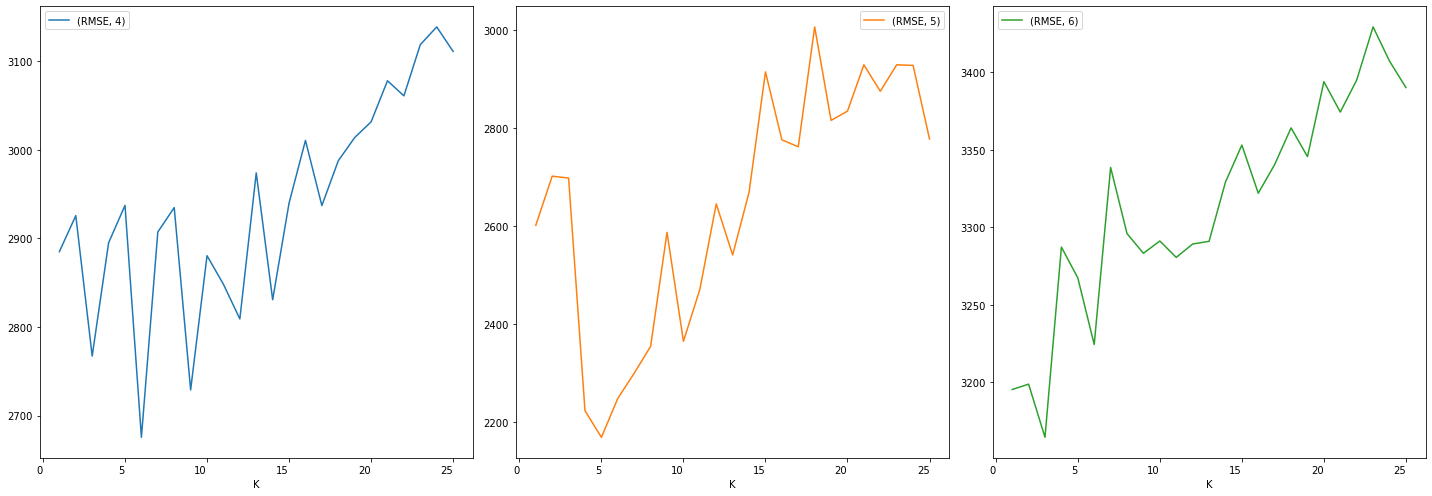

In [40]:
ax = df.unstack(level=0).plot(kind='line', subplots=True, rot=0, figsize=(20, 7), layout=(1, 3))
plt.tight_layout()